In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

In [ ]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir("/content/drive/MyDrive/datasets/train/flowers")
!ls

daisy  dandelion  rose	sunflower  tulip


In [ ]:
import os
for dirname, _, filenames in os.walk('/datasets/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
flowers_path = "/content/drive/MyDrive/datasets/train/flowers"

In [ ]:
classes = os.listdir(flowers_path)
classes

['tulip', 'sunflower', 'rose', 'dandelion', 'daisy']

In [ ]:
image_size = (128, 128)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    flowers_path,
    validation_split=0.2,          
    subset="training",             
    seed=1337,                     
    image_size=image_size,         
    batch_size=batch_size,         
    label_mode="categorical",      
    class_names=classes
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    flowers_path,
    validation_split=0.2,
    subset="validation",          
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical",
    class_names=classes
)


Found 4337 files belonging to 5 classes.
Using 3470 files for training.
Found 4337 files belonging to 5 classes.
Using 867 files for validation.


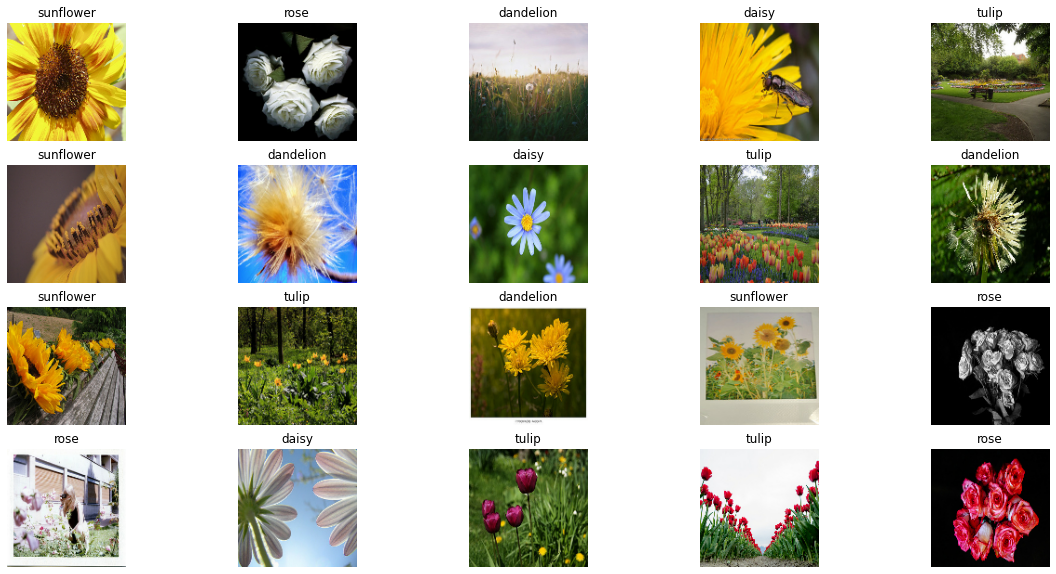

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(1):      
    for i in range(20):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[np.argmax(labels[i])])  
        plt.axis("off")
plt.show()

In [ ]:
input_shape = (128, 128, 3)


model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(200, activation="relu"),
        layers.Dense(10, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(1000, activation='relu'),
        
        layers.Dense(len(classes), activation="softmax"),
    ]
)


model.build(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 200)               9830600   
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                                 
 dense_2 (Dense)             (None, 100)               1100      
                                                                 
 dense_3 (Dense)             (None, 1000)              101000    
                                                                 
 dense_4 (Dense)             (None, 5)                 5005      
                                                                 
Total params: 9,939,715
Trainable params: 9,939,715
Non-

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, verbose=1, validation_data=val_ds)

Epoch 1/10
109/109 [==============================] - 284s 3s/step - loss: 8.3046 - accuracy: 0.2156 - val_loss: 1.5944 - val_accuracy: 0.2722
Epoch 2/10
109/109 [==============================] - 16s 141ms/step - loss: 1.6017 - accuracy: 0.2297 - val_loss: 1.5925 - val_accuracy: 0.2722
Epoch 3/10
109/109 [==============================] - 16s 142ms/step - loss: 1.6016 - accuracy: 0.2311 - val_loss: 1.5926 - val_accuracy: 0.2722
Epoch 4/10
109/109 [==============================] - 16s 143ms/step - loss: 1.6017 - accuracy: 0.2317 - val_loss: 1.5927 - val_accuracy: 0.2722
Epoch 5/10
109/109 [==============================] - 16s 144ms/step - loss: 1.6015 - accuracy: 0.2285 - val_loss: 1.5931 - val_accuracy: 0.2722
Epoch 6/10
109/109 [==============================] - 16s 140ms/step - loss: 1.6015 - accuracy: 0.2256 - val_loss: 1.5929 - val_accuracy: 0.2722
Epoch 7/10
109/109 [==============================] - 16s 142ms/step - loss: 1.6015 - accuracy: 0.2300 - val_loss: 1.5923 - val_accu

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

xepochs = [n for n in range(len(history.history['accuracy']))]

fig = make_subplots(rows=1, cols=2, subplot_titles=("Accuracy over time", "Loss over time"))

for metric in ['accuracy', 'val_accuracy']:
    fig.add_trace(go.Scatter(x=xepochs, y=history.history[metric], mode='lines+markers', name=metric), row=1, col=1)

for metric in ['loss', 'val_loss']:
    fig.add_trace(go.Scatter(x=xepochs, y=history.history[metric], mode='lines+markers', name=metric), row=1, col=2)

fig.update_xaxes(title_text="Epoch", row=1, col=1)
fig.update_xaxes(title_text="Epoch", row=1, col=2)

fig.update_yaxes(title_text="Accuracy", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.show()

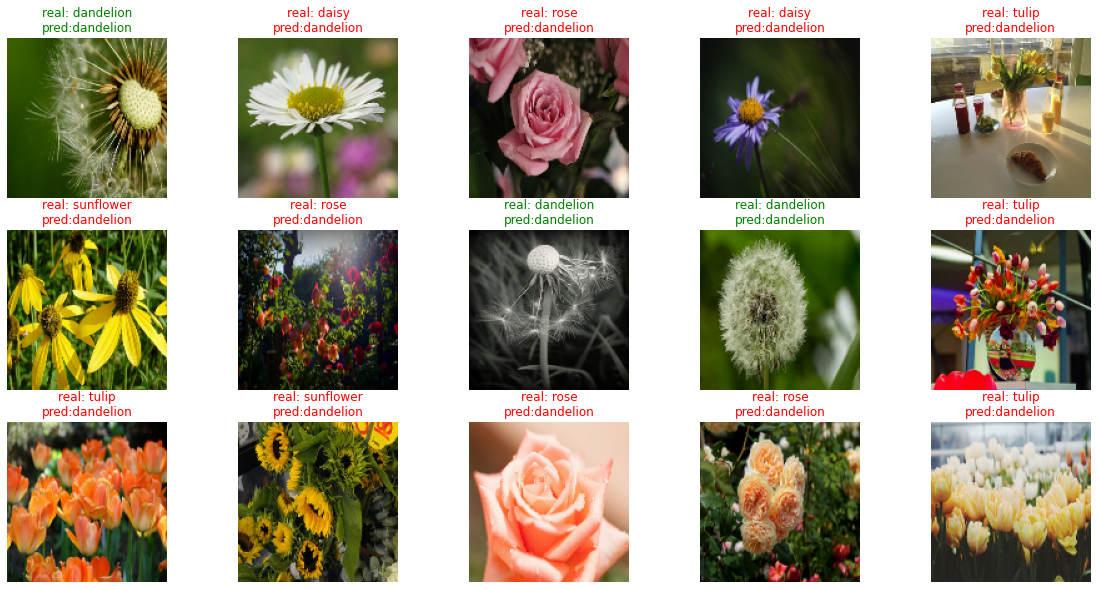

In [ ]:
plt.figure(figsize=(20, 10))
for images, labels in val_ds.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        
        img_array = images[i].numpy().astype("uint8")
        prediction = model.predict(np.array([img_array]))
        prediction_name = classes[np.argmax(prediction)]
        real_name = classes[np.argmax(labels[i])]
        
        plt.imshow(img_array)
        if prediction_name == real_name:
            plt.title(f'real: {real_name}\npred:{prediction_name}', fontdict={'color': 'g'})
        else:
            plt.title(f'real: {real_name}\npred:{prediction_name}', fontdict={'color': 'r'})
        
        plt.axis("off")


In [ ]:
import pickle


In [ ]:
pickle.dump(model,open('flower_model.h5','wb'))

NameError: ignored